# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
import pandas as pd
import numpy as np
import datetime 

# Load the data into a DataFrame
df = pd.read_csv('Iowa_liquor_sales_sample_10pct.csv')

In [2]:
# set the display to max 30 rows and max 20 columns
pd.set_option("display.max_rows",30)    
pd.set_option("display.max_columns",20)

# data overview
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [3]:
# basic info about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [4]:
# change column names
df.columns = ['date','store_number','city','zipcode','county_number','county','category','category_name','vendor_number',\
             'item_number','item_description','bottle_volume_ml','state_bottle_cost','state_bottle_retail','bottles_sold',\
             'sales','volume_sold_liters','volume_sold_gallons']

# Transform the dates into datetime datatype
df["date"] = pd.to_datetime(df["date"], format="%m/%d/%Y")

# Split datetime into year, month, day, weekday, and int value of the date(for plotting)
temp = pd.DatetimeIndex(df['date'])
df['year'] = temp.year
df['month'] = temp.month
df['day'] = temp.day
df['weekday'] = temp.weekday
df['quarter'] = temp.quarter
df['date_p'] = 10000*temp.year + 100*temp.month + temp.day

# check if weekday works. No alcohol on Sundays! 
df.weekday.value_counts()

2    73129
1    72571
0    69483
3    48121
4     5455
5     2196
Name: weekday, dtype: int64

In [5]:
# get rid of the '$' and change those columns into float
def dollar_sign(x):
    try:
        y = (str(x)).replace('$','')
        return float(y)
    except:
        pass      
df['sales'] = df['sales'].apply(dollar_sign)
df['state_bottle_cost'] = df['state_bottle_cost'].apply(dollar_sign)
df['state_bottle_retail'] = df['state_bottle_retail'].apply(dollar_sign)

# change the datatype of zipcode into float
def _float(x):
    try:
        y = float(x)
        return y
    except:
        pass
df['zipcode'] = df['zipcode'].apply(_float)

# check remaining object columns
df.loc[:, df.dtypes == object]


,city,county,category_name,item_description
0,SUMNER,Bremer,APRICOT BRANDIES,Mr. Boston Apricot Brandy
1,DAVENPORT,Scott,BLENDED WHISKIES,Tin Cup
2,CEDAR FALLS,Black Hawk,STRAIGHT BOURBON WHISKIES,Jim Beam
3,AMES,Story,AMERICAN COCKTAILS,1800 Ultimate Margarita
4,BELMOND,Wright,VODKA 80 PROOF,Five O'clock Vodka
5,CEDAR RAPIDS,Linn,AMERICAN DRY GINS,New Amsterdam Gin
6,OTTUMWA,Wapello,AMERICAN GRAPE BRANDIES,Korbel Brandy
7,CLEAR LAKE,Cerro Gordo,CANADIAN WHISKIES,Canadian Club Whisky
8,BONDURANT,Polk,IMPORTED VODKA,Absolut Swedish Vodka 80 Prf
9,SHELLSBURG,Benton,CINNAMON SCHNAPPS,Dekuyper Hot Damn!


In [6]:
# check all datatypes
df.dtypes

date                   datetime64[ns]
store_number                    int64
city                           object
zipcode                       float64
county_number                 float64
county                         object
category                      float64
category_name                  object
vendor_number                   int64
item_number                     int64
item_description               object
bottle_volume_ml                int64
state_bottle_cost             float64
state_bottle_retail           float64
bottles_sold                    int64
sales                         float64
volume_sold_liters            float64
volume_sold_gallons           float64
year                            int32
month                           int32
day                             int32
weekday                         int32
quarter                         int32
date_p                          int32
dtype: object

In [7]:
# check missing values
df.isnull().values.any()

True

In [8]:
# print out rows that contain missing data
null_data = df[df.isnull().any(axis=1)]
null_data

,date,store_number,city,zipcode,county_number,county,category,category_name,vendor_number,item_number,...,bottles_sold,sales,volume_sold_liters,volume_sold_gallons,year,month,day,weekday,quarter,date_p
114,2015-01-16,4307,DUNLAP,NaN,43.0,Harrison,1062300.0,FLAVORED RUM,35,43136,...,2,25.50,1.50,0.40,2015,1,16,4,1,20150116
135,2016-01-20,5222,CEDAR RAPIDS,52402.0,NaN,NaN,1051010.0,AMERICAN GRAPE BRANDIES,115,53214,...,24,115.92,9.00,2.38,2016,1,20,2,1,20160120
198,2016-03-02,3820,SIOUX CITY,51103.0,NaN,NaN,1032080.0,IMPORTED VODKA,35,34359,...,12,90.00,2.40,0.63,2016,3,2,2,1,20160302
272,2016-03-21,4222,EVANSDALE,50707.0,NaN,NaN,1062300.0,FLAVORED RUM,370,42716,...,3,33.72,2.25,0.59,2016,3,21,0,1,20160321
290,2016-03-21,5236,ANAMOSA,52205.0,NaN,NaN,1081600.0,WHISKEY LIQUEUR,421,64868,...,6,138.00,10.50,2.77,2016,3,21,0,1,20160321
321,2016-02-23,4203,WAVERLY,50677.0,NaN,NaN,1051100.0,APRICOT BRANDIES,434,55084,...,24,127.92,9.00,2.38,2016,2,23,1,1,20160223
863,2016-01-11,2460,HAMPTON,50441.0,NaN,NaN,1011200.0,STRAIGHT BOURBON WHISKIES,461,77776,...,3,47.25,2.25,0.59,2016,1,11,0,1,20160111
896,2015-02-05,4829,DES MOINES,50314.0,77.0,Polk,1022200.0,NaN,85,3657,...,6,212.22,4.50,1.19,2015,2,5,3,1,20150205
901,2016-02-25,4647,WATERLOO,50707.0,7.0,Black Hawk,1052100.0,NaN,420,48099,...,24,206.64,4.80,1.27,2016,2,25,3,1,20160225
964,2015-05-19,4247,BELMOND,50421.0,NaN,NaN,1012100.0,CANADIAN WHISKIES,55,12408,...,6,82.26,10.50,2.77,2015,5,19,1,2,20150519


In [9]:
# take a closer look at the missing data
null_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1882 entries, 114 to 270654
Data columns (total 24 columns):
date                   1882 non-null datetime64[ns]
store_number           1882 non-null int64
city                   1882 non-null object
zipcode                1665 non-null float64
county_number          805 non-null float64
county                 805 non-null object
category               1814 non-null float64
category_name          1250 non-null object
vendor_number          1882 non-null int64
item_number            1882 non-null int64
item_description       1882 non-null object
bottle_volume_ml       1882 non-null int64
state_bottle_cost      1882 non-null float64
state_bottle_retail    1882 non-null float64
bottles_sold           1882 non-null int64
sales                  1882 non-null float64
volume_sold_liters     1882 non-null float64
volume_sold_gallons    1882 non-null float64
year                   1882 non-null int32
month                  1882 non-null int32
da

In [10]:
# drop rows with missing data, 1882 rows is less than 1% in the sample
df.dropna(inplace=True)

In [11]:
df.columns

Index([u'date', u'store_number', u'city', u'zipcode', u'county_number',
       u'county', u'category', u'category_name', u'vendor_number',
       u'item_number', u'item_description', u'bottle_volume_ml',
       u'state_bottle_cost', u'state_bottle_retail', u'bottles_sold', u'sales',
       u'volume_sold_liters', u'volume_sold_gallons', u'year', u'month',
       u'day', u'weekday', u'quarter', u'date_p'],
      dtype='object')

In [12]:
# count how many unique values there are in each columns
for x in df.columns: 
    print x + ": " + str(len(df[x].unique()))

date: 274
store_number: 1377
city: 381
zipcode: 411
county_number: 99
county: 99
category: 72
category_name: 71
vendor_number: 115
item_number: 2675
item_description: 2157
bottle_volume_ml: 29
state_bottle_cost: 1079
state_bottle_retail: 1104
bottles_sold: 136
sales: 6552
volume_sold_liters: 263
volume_sold_gallons: 259
year: 2
month: 12
day: 31
weekday: 6
quarter: 4
date_p: 274


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [14]:
# creating a new column for profit per bottle 
df['bottle_profit'] = (df['state_bottle_retail'] - df['state_bottle_cost'])

# creating a new column for profit margin 
df['profit_margin'] = (df['bottle_profit']/df['state_bottle_retail'])

# creating a column for profit
df['profit'] = df['bottle_profit'] * df['bottles_sold']

# check the basic info for profit margin
print df['profit_margin'].describe()

# check the basic info for profit margin
print df['profit'].describe()

count    269073.000000
mean          0.334218
std           0.004990
min           0.000000
25%           0.333333
50%           0.333333
75%           0.333603
max           0.714286
Name: profit_margin, dtype: float64
count    269073.000000
mean         43.084057
std         128.792318
min           0.000000
25%          10.160000
50%          23.520000
75%          45.000000
max       12130.800000
Name: profit, dtype: float64


In [15]:
# create a subset with numeric value columns
df_number = pd.DataFrame(df, columns = ['bottle_volume_ml','state_bottle_cost','state_bottle_retail','bottles_sold',\
                                        'sales','volume_sold_liters','volume_sold_gallons','bottle_profit','profit_margin','profit'])

# check the basic stats info regarding those number columns
df_number.describe()

,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sales,volume_sold_liters,volume_sold_gallons,bottle_profit,profit_margin,profit
count,269073.000000,269073.000000,269073.000000,269073.000000,269073.000000,269073.000000,269073.000000,269073.000000,269073.000000,269073.000000
mean,925.195597,9.762554,14.659744,9.877022,128.860684,8.993455,2.376027,4.897190,0.334218,43.084057
std,492.887121,7.036384,10.554062,24.079927,383.599730,28.972703,7.653771,3.518526,0.004990,128.792318
min,50.000000,0.890000,1.340000,1.000000,1.340000,0.100000,0.030000,0.000000,0.000000,0.000000
25%,750.000000,5.500000,8.250000,2.000000,30.450000,1.500000,0.400000,2.760000,0.333333,10.160000
50%,750.000000,8.000000,12.110000,6.000000,70.560000,5.250000,1.390000,4.040000,0.333333,23.520000
75%,1000.000000,11.920000,17.880000,12.000000,135.000000,10.500000,2.770000,5.960000,0.333603,45.000000
max,6000.000000,425.000000,637.500000,2508.000000,36392.400000,2508.000000,662.540000,212.500000,0.714286,12130.800000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115115c10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x127278a50>]], dtype=object)

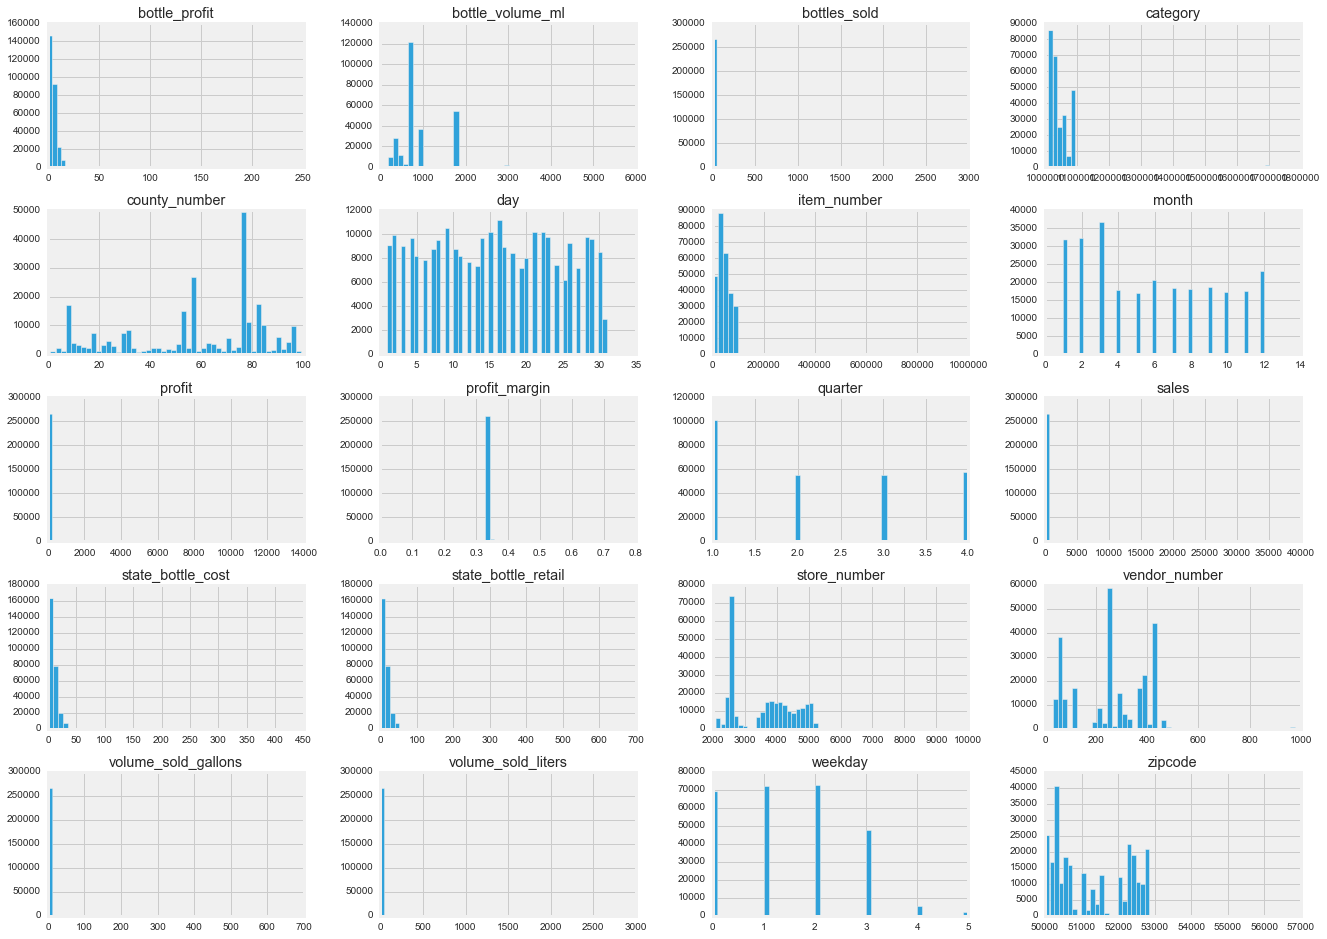

In [16]:
# check the data distributions for applicable columns
exclude = ['date_p', 'year']
df.ix[:, df.columns.difference(exclude)].hist(figsize=(20,16), bins =50) 

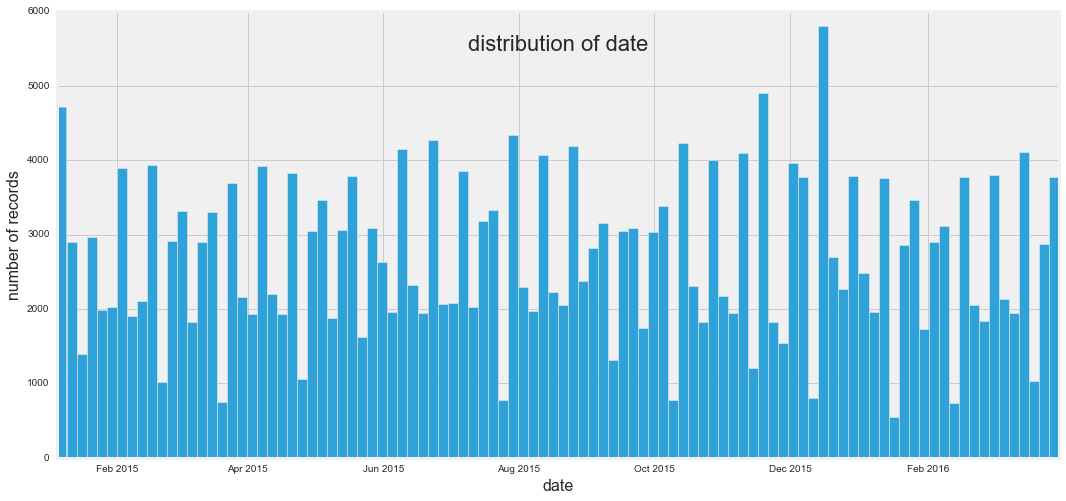

count                  269073
unique                    274
top       2015-12-01 00:00:00
freq                     1554
first     2015-01-05 00:00:00
last      2016-03-31 00:00:00
Name: date, dtype: object


In [17]:
# check the range and distribution of date
fig = df.date.hist(figsize=(16,8),bins=100)
ax = plt.gca()
ax.set_title('distribution of date', fontsize=22, y=.90)
ax.set_xlabel('date', fontsize =16)
ax.set_ylabel('number of records', fontsize=16, rotation=90)
plt.show()

# check date range
print df.date.describe()

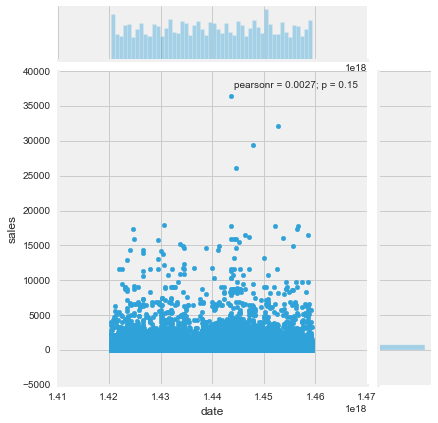

In [18]:
# creating a temp Series for plotting datetime in seaborn
date_t = df['date'].astype(int)

# plotting datetime in seaborn
sns.jointplot(date_t,df['sales'], kind = 'scatter')

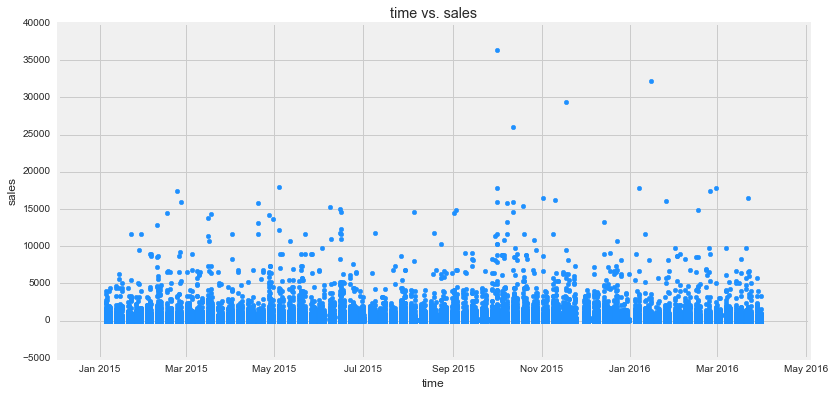

In [19]:
# plot time vs. sales using plt
plt.figure(figsize=(12,6))
plt.title('time vs. sales')
temp_t = pd.DatetimeIndex(df['date'])
plt.scatter(temp_t.to_pydatetime(), df.sales, color = 'dodgerblue')
plt.xlabel('time')
plt.ylabel('sales')

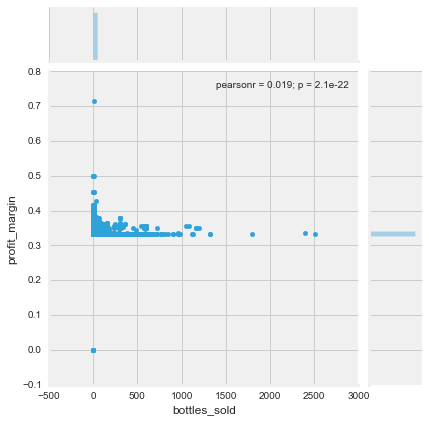

In [20]:
# check the correlation between bottles sold and profit margin
sns.jointplot(df['bottles_sold'],df['profit_margin'], kind = 'scatter')

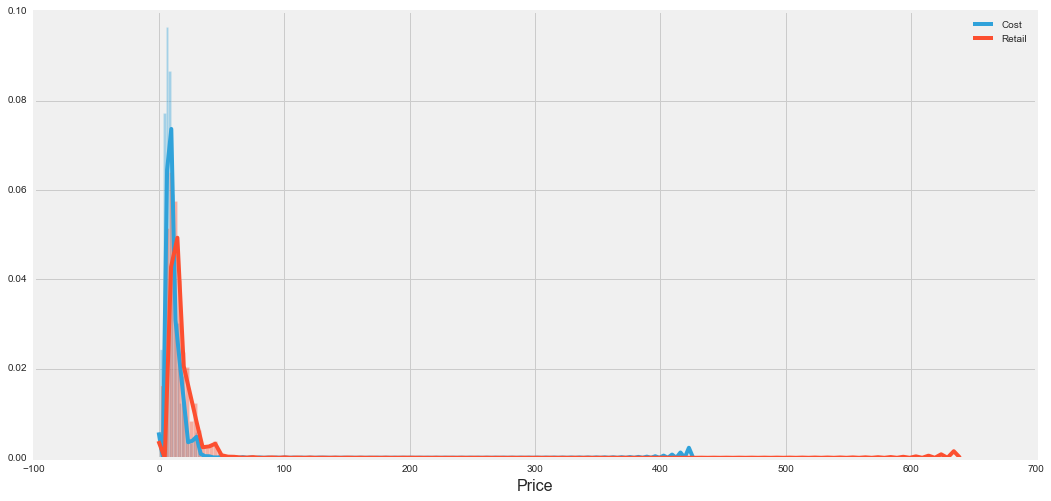

In [21]:
# compare purchase price and retail price
plt.figure(figsize=(16,8))
sns.distplot(df.state_bottle_cost, bins = 200, kde_kws={"label": "Cost"})
sns.distplot(df.state_bottle_retail, bins = 200, kde_kws={"label": "Retail"})
plt.xlabel('Price', fontsize=16)

plt.show()

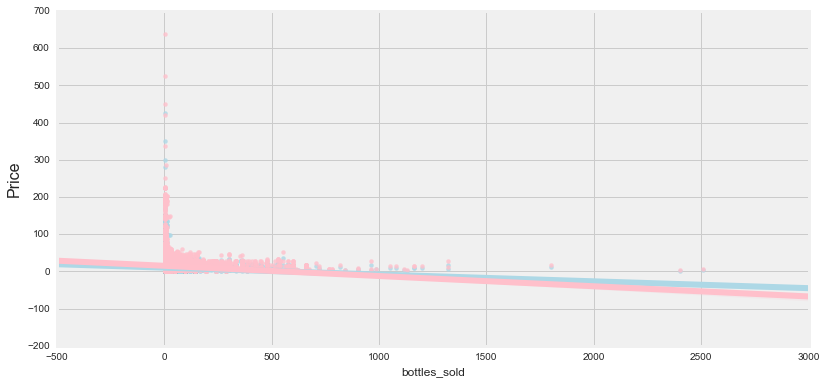

In [22]:
# compare purchase price and retail price based on the bottle size in ml
plt.figure(figsize=(12,6))
sns.regplot(y="state_bottle_cost", x="bottles_sold", data=df, color='lightblue', label= "Cost")
sns.regplot(y='state_bottle_retail', x='bottles_sold', data=df, color='pink', label= "Retail")
plt.ylabel('Price', fontsize=16)
plt.show()

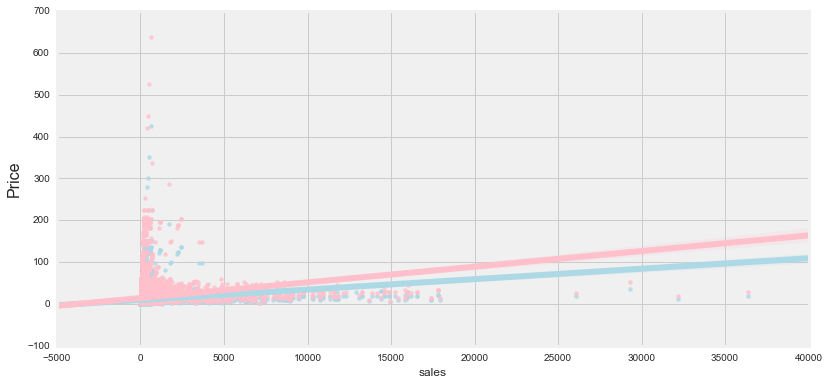

In [23]:
# compare purchase price and retail price based on the bottle size in ml
plt.figure(figsize=(12,6))
sns.regplot(y="state_bottle_cost", x="sales", data=df, color='lightblue', label= "Cost")
sns.regplot(y='state_bottle_retail', x='sales', data=df, color='pink', label= "Retail")
plt.ylabel('Price', fontsize=16)
plt.show()

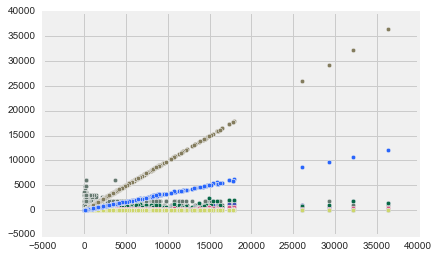

In [24]:
# check the correlation of sales with other variables 
for x in df_number: 
    plt.scatter(df_number.sales, df_number[x], c=np.random.rand(3,1), label = x)

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

This dataset contains data that describes the liquor sales of 2015 and the 1st quarter of 2016 in the State of Ohio. There are 269,073 records that are sampled from 1,377 stores in 381 different cities (99 counties). There are 2,675 types of items in 29 different sizes from 72 different categories that were distributed by 115 vendors. Most variables have strong correlations with each other. Numbers of records are fairly evenly distributed throughout time, other than there is a spike at the end of 2015 and the beginning of 2016. 

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

In [44]:
# create a pivot table that calculates the yearly liquor sales for each store - S1
pd.pivot_table(df, index=['store_number', 'year'], aggfunc = {'bottles_sold':[sum, np.mean], 'sales':[sum, np.mean, len], 'profit':[sum, np.mean]})

bottles_sold              profit             sales  \
                          mean    sum         mean       sum     len   
store_number year                                                      
2106         2015    19.686312  10355    92.665779  48742.20   526.0   
             2016    17.603175   2218    80.751429  10174.68   126.0   
2113         2015     4.564626    671    21.149932   3109.04   147.0   
             2016     4.297297    159    18.742973    693.49    37.0   
2130         2015    18.971867   7418    95.215652  37229.32   391.0   
             2016    14.752137   1726    79.387094   9288.29   117.0   
2152         2015     4.063830    573    18.351277   2587.53   141.0   
             2016     4.850000     97    15.204000    304.08    20.0   
2178         2015     8.135021   1928    34.454430   8165.70   237.0   
             2016     8.275862    480    32.220000   1868.76    58.0   
2190         2015     8.449430  11111    30.888008  40617.73  1315.0   
             2016     8.083333   2425    35.349233  10604.77   300.0   
2191         2015    12.912752   7696    70.040923  41744.39   596.0   
             2016    18.251748   2610   110.381329  15784.53   143.0   
2200         2015     4.138958   1668    18.991241   7653.47   403.0   
...                        ...    ...          ...       ...     ...   
5212         2016     4.350000     87    12.128500    242.57    20.0   
5213         2015    48.000000     48    60.000000     60.00     1.0   
             2016     5.750000     69    12.847500    154.17    12.0   
5215         2015     1.500000      3     9.340000     18.68     2.0   
             2016     3.641509    193    13.841321    733.59    53.0   
9001         2015    37.826087    870   408.855652   9403.68    23.0   
             2016    24.000000     24   236.160000    236.16     1.0   
9002         2015    50.181818   2208   285.774545  12574.08    44.0   
             2016    15.600000     78    92.220000    461.10     5.0   
9010         2015    21.750000    348   120.007500   1920.12    16.0   
             2016    12.000000     12    59.160000     59.16     1.0   
9013         2015    57.000000    228   184.950000    739.80     4.0   
             2016    18.000000     36    60.300000    120.60     2.0   
9018         2015   300.000000    300  2145.000000   2145.00     1.0   
9023         2016    24.000000     24   211.200000    211.20     1.0   

                                           
                          mean        sum  
store_number year                          
2106         2015   277.640114  146038.70  
             2016   241.894841   30478.75  
2113         2015    63.334830    9310.22  
             2016    55.835135    2065.90  
2130         2015   285.380844  111583.91  
             2016   238.086410   27856.11  
2152         2015    54.759433    7721.08  
             2016    45.233000     904.66  
2178         2015   102.633671   24324.18  
             2016    96.353448    5588.50  
2190         2015    92.539209  121689.06  
             2016   106.010200   31803.06  
2191         2015   209.888406  125093.49  
             2016   331.036364   47338.20  
2200         2015    56.604342   22811.55  
...                        ...        ...  
5212         2016    36.359000     727.18  
5213         2015   180.000000     180.00  
             2016    38.531667     462.38  
5215         2015    28.015000      56.03  
             2016    41.502075    2199.61  
9001         2015  1226.457391   28208.52  
             2016   708.240000     708.24  
9002         2015   856.830000   37700.52  
             2016   276.528000    1382.64  
9010         2015   359.872500    5757.96  
             2016   177.480000     177.48  
9013         2015   554.370000    2217.48  
             2016   180.780000     361.56  
9018         2015  6435.000000    6435.00  
9023         2016   633.360000     633.36  

[2651 rows x 7 columns]

In [26]:
# calculate basic sales data 
pd.pivot_table(df, index = ['year'], values = ['sales', 'profit','bottles_sold','volume_sold_liters'],aggfunc = (sum,np.mean)).round(2)

sales              profit        bottles_sold        \
              sum    mean         sum   mean          sum  mean   
year                                                              
2015  28463475.99  130.47  9518875.63  43.63      2171839  9.96   
2016   6209454.71  121.97  2073880.71  40.74       485801  9.54   

     volume_sold_liters        
                    sum  mean  
year                           
2015         1983101.95  9.09  
2016          436793.94  8.58

In [27]:
# check how many zipcode, city, and county there are
print len(df.zipcode.unique()), len(df.city.unique()),len(df.county.unique())

411 381 99


In [28]:
# creating a pivot table that group by locations - S2
pd.pivot_table(df, index=['county','city','zipcode'], \
               aggfunc = {'bottles_sold':[sum, np.mean], 'sales':[sum, np.mean, len, max, min], 'profit':[sum, np.mean],\
              'state_bottle_retail':[sum,np.mean]}).round(2)

bottles_sold        profit              sales  \
                                        mean    sum   mean        sum     len   
county    city          zipcode                                                 
Adair     ADAIR         50002.0        13.67    588  45.61    1961.32    43.0   
          FONTANELLE    50846.0         8.50    527  47.93    2971.68    62.0   
          GREENFIELD    50849.0         7.35   1426  29.08    5640.80   194.0   
          STUART        50250.0         7.40   2109  28.03    7989.10   285.0   
Adams     CORNING       50841.0         4.08    955  17.74    4150.99   234.0   
Allamakee HARPERS FERRY 52146.0         8.54    410  28.83    1383.86    48.0   
          LANSING       52151.0         6.37    956  23.32    3497.40   150.0   
          POSTVILLE     52162.0         8.41    387  32.16    1479.22    46.0   
          WAUKON        52172.0         7.12   5697  33.49   26790.77   800.0   
Appanoose CENTERVILLE   52544.0         7.97   7751  31.29   30449.17   973.0   
          MORAVIA       52571.0         6.27    420  36.48    2444.42    67.0   
Audubon   AUDUBON       50025.0         6.65   1364  26.92    5518.84   205.0   
          EXIRA         50076.0        15.00    330  48.77    1072.92    22.0   
Benton    BELLE PLAINE  52208.0         6.51   2695  27.32   11311.52   414.0   
          SHELLSBURG    52332.0         2.92    962  10.85    3569.85   329.0   
...                                      ...    ...    ...        ...     ...   
Woodbury  SIOUX CITY    51103.0        14.55  18670  63.11   80972.35  1283.0   
                        51104.0         7.16  11211  31.72   49633.98  1565.0   
                        51105.0        10.78  11809  38.88   42576.28  1095.0   
                        51106.0        14.64  34487  70.71  166583.41  2356.0   
                        51108.0        10.52   7394  45.04   31662.72   703.0   
                        51109.0         7.08   1380  27.12    5287.63   195.0   
          SLOAN         51055.0         8.65    977  31.82    3595.25   113.0   
Worth     MANLY         50456.0        10.02    401  25.10    1004.07    40.0   
          NORTHWOOD     50459.0         5.03   1086  22.05    4763.15   216.0   
          Northwood     50459.0        10.46   1370  51.92    6801.96   131.0   
Wright    BELMOND       50421.0         9.92   1796  40.91    7404.36   181.0   
          CLARION       50525.0         7.93   1317  31.65    5253.95   166.0   
          DOWS          50071.0        15.23    198  51.81     673.50    13.0   
          EAGLE GROVE   50533.0         9.14   2706  43.50   12875.80   296.0   
          GOLDFIELD     50542.0        20.80    312  51.52     772.80    15.0   

                                                                     \
                                      max    mean    min        sum   
county    city          zipcode                                       
Adair     ADAIR         50002.0    341.88  136.07  53.28    5851.20   
          FONTANELLE    50846.0    801.18  143.75  20.46    8912.49   
          GREENFIELD    50849.0   1349.40   87.05   5.07   16887.43   
          STUART        50250.0    758.16   83.84   4.61   23893.08   
Adams     CORNING       50841.0    488.16   53.17   4.95   12441.71   
Allamakee HARPERS FERRY 52146.0    537.48   85.52   5.67    4105.18   
          LANSING       52151.0    271.32   69.68   6.84   10451.86   
          POSTVILLE     52162.0    337.56   96.45  28.32    4436.50   
          WAUKON        52172.0   1343.70  100.01   6.00   80006.46   
Appanoose CENTERVILLE   52544.0   6402.00   93.64   2.99   91108.59   
          MORAVIA       52571.0    333.00  109.27   7.13    7321.28   
Audubon   AUDUBON       50025.0   1074.96   80.23   5.76   16447.52   
          EXIRA         50076.0    486.00  145.82  30.36    3208.02   
Benton    BELLE PLAINE  52208.0    470.40   81.81   5.67   33868.17   
          SHELLSBURG    52332.0    211.56   32.46   5.33   10680.62   

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [29]:
# creating a new dataframe for 2015 and one for 2016
df2015 = df.ix[(df['year']==2015)]
df2016 = df.ix[(df['year']==2016)]
df2015q1 = df2015.ix[(df2015['quarter']==1)]
df2015q234 = df2015.ix[(df2015['quarter']==2)|(df2015['quarter']==3)|(df2015['quarter']==4)]

# pivot the data by stores
df2015q1_s = df2015q1.pivot_table(index = 'store_number',aggfunc = sum)
df2015q234_s = df2015q234.pivot_table(index = 'store_number',aggfunc = sum)
df2016s = df2016.pivot_table(index = 'store_number',aggfunc = sum)


In [30]:
del_c = ['category','date_p','day','item_number','month','quarter','volume_sold_gallons','weekday','year','zipcode','vendor_number','county_number']
df2015q1_s.drop(del_c, axis =1, inplace=True)
df2015q234_s.drop(del_c, axis =1, inplace=True)
df2016s.drop(del_c, axis =1, inplace=True)

In [31]:
df2016

,date,store_number,city,zipcode,county_number,county,category,category_name,vendor_number,item_number,...,volume_sold_gallons,year,month,day,weekday,quarter,date_p,bottle_profit,profit_margin,profit
1,2016-03-02,2614,DAVENPORT,52807.0,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,0.40,2016,3,2,2,1,20160302,6.88,0.333495,13.76
2,2016-02-11,2106,CEDAR FALLS,50613.0,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,6.34,2016,2,11,3,1,20160211,6.30,0.333510,151.20
3,2016-02-03,2501,AMES,50010.0,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,2.77,2016,2,3,2,1,20160203,4.75,0.333333,28.50
8,2016-01-04,4757,BONDURANT,50035.0,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,...,0.79,2016,1,4,0,1,20160104,5.75,0.333527,23.00
13,2016-02-29,4673,WEST POINT,52656.0,56.0,Lee,1081300.0,PEPPERMINT SCHNAPPS,322,75211,...,2.38,2016,2,29,0,1,20160229,5.00,0.333333,60.00
14,2016-01-04,2670,CORALVILLE,52241.0,52.0,Johnson,1031200.0,VODKA FLAVORED,380,41705,...,3.17,2016,1,4,0,1,20160104,3.75,0.333333,45.00
16,2016-02-25,2130,WATERLOO,50703.0,7.0,Black Hawk,1031100.0,100 PROOF VODKA,297,35913,...,2.54,2016,2,25,3,1,20160225,0.57,0.335294,27.36
24,2016-03-14,2618,CEDAR RAPIDS,52402.0,57.0,Linn,1031080.0,VODKA 80 PROOF,297,35926,...,2.38,2016,3,14,0,1,20160314,1.69,0.333992,20.28
38,2016-01-27,2637,DAVENPORT,52804.0,82.0,Scott,1081900.0,MISC. AMERICAN CORDIALS & LIQUEURS,205,77759,...,1.19,2016,1,27,2,1,20160127,3.25,0.333333,39.00
39,2016-03-07,2633,DES MOINES,50320.0,77.0,Polk,1011200.0,STRAIGHT BOURBON WHISKIES,461,22157,...,3.17,2016,3,7,0,1,20160307,8.08,0.333333,96.96


# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [32]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 10, 10
% matplotlib inline
import seaborn as sns

from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_predict
from sklearn.metrics import r2_score

from sklearn import linear_model
import statsmodels.formula.api as smf

In [33]:
# function that build a model based on 1st quarter 2016, then test it on 1st quarter 2015 
def Q1_2016_to_Q1_2015(x):
    # columns we want to exclude as features
    exclude = x
    # set 2016's 1st quarter as the training set to build the model on
    x_train = df2016s.ix[:, df2016s.columns.difference(exclude)]
    y_train = df2016s['sales']
    # set 2015's 1st quarter as the testing set to see how well the model performs
    x_test = df2015q1_s.ix[:, df2015q1_s.columns.difference(exclude)]
    y_test = df2015q1_s['sales']
    # print out the number of features used and what they are
    print "Number of features: ", len(x_train.columns)
    print x_train.columns.values
    print #empty line

    # use sklearn's linear regression to build a model based on our testing data
    # this model uses OLS(ordinary least squares)-minimizing sum of squared errors to optimize the model
    lr = linear_model.LinearRegression()
    lr_model = lr.fit(x_train, y_train) 
    # see how well the model fits the training set
    r2_train = r2_score(y_train, lr_model.predict(x_train))
    # see how well the model fits the testing set
    r2_test = r2_score(y_test, lr_model.predict(x_test))
    # print the results
    print "coefficient:", lr.coef_
    print "intercept:", lr.intercept_
    print "Linear Model: ",r2_train, r2_test
    print # empty line


    alphas = [0.01,1,100]
    # thie model uses gradient descent/ L1 norm(absolute values) penalty to regulize the fucntion
    # creat a function to run lasso regularization with different alpha
    def lasso(x):
        lasso = linear_model.Lasso(alpha= x)
        lasso_model = lasso.fit(x_train, y_train)
        r2_l_train = r2_score(y_train, lasso_model.predict(x_train))
        r2_l_test = r2_score(y_test, lasso_model.predict(x_test))
        print "Lasso Model: ",r2_l_train, r2_l_test,"(alpha is ", x,")"
    # print results
    [lasso(x) for x in alphas]
    print # empty line

    # thie model uses gradient descent/ L2 norm(sqaures) penalty to regulize the fucntion
    # creat a function to run ridge regularization with different alpha
    def ridge(x):
        ridge = linear_model.Ridge(alpha= x)
        ridge_model = ridge.fit(x_train, y_train)
        r2_r_train = r2_score(y_train, ridge_model.predict(x_train))
        r2_r_test = r2_score(y_test, ridge_model.predict(x_test))
        print "Ridge Model: ", r2_r_train, r2_r_test,"(alpha is ", x,")"
    # print results
    [ridge(x) for x in alphas]
    
    plt.scatter(y_train, lr_model.predict(x_train),color ='lightblue', alpha=0.5)
    plt.scatter(y_test, lr_model.predict(x_test),color ='pink', alpha=0.5)
    plt.xlabel('True Sales')
    plt.ylabel('Prediction')
    plt.show()

In [34]:
# function that build a model based on 1st quarter 2016, then test it on 1st quarter 2015 
def Q1_2015_to_Q234_2015(x):
    # columns we want to exclude as features
    exclude = x
    # set 2016's 1st quarter as the training set to build the model on
    x_train = df2015q1_s.ix[:, df2015q1_s.columns.difference(exclude)]
    y_train = df2015q1_s['sales']
    # set 2015's 1st quarter as the testing set to see how well the model performs
    x_test = df2015q234_s.ix[:, df2015q234_s.columns.difference(exclude)]
    y_test = df2015q234_s['sales']
    # print out the number of features used and what they are
    print "Number of features: ", len(x_train.columns)
    print x_train.columns.values
    print #empty line

    # use sklearn's linear regression to build a model based on our testing data
    # this model uses OLS(ordinary least squares)-minimizing sum of squared errors to optimize the model
    lr = linear_model.LinearRegression()
    lr_model = lr.fit(x_train, y_train) 
    # see how well the model fits the training set
    r2_train = r2_score(y_train, lr_model.predict(x_train))
    # see how well the model fits the testing set
    r2_test = r2_score(y_test, lr_model.predict(x_test))
    # print the results
    print "coefficient:", lr.coef_
    print "intercept:", lr.intercept_
    print "Linear Model: ",r2_train, r2_test
    print # empty line


    alphas = [0.01,1,100]
    # thie model uses gradient descent/ L1 norm(absolute values) penalty to regulize the fucntion
    # creat a function to run lasso regularization with different alpha
    def lasso(x):
        lasso = linear_model.Lasso(alpha= x)
        lasso_model = lasso.fit(x_train, y_train)
        r2_l_train = r2_score(y_train, lasso_model.predict(x_train))
        r2_l_test = r2_score(y_test, lasso_model.predict(x_test))
        print "Lasso Model: ",r2_l_train, r2_l_test,"(alpha is ", x,")"
    # print results
    [lasso(x) for x in alphas]
    print # empty line

    # thie model uses gradient descent/ L2 norm(sqaures) penalty to regulize the fucntion
    # creat a function to run ridge regularization with different alpha
    def ridge(x):
        ridge = linear_model.Ridge(alpha= x)
        ridge_model = ridge.fit(x_train, y_train)
        r2_r_train = r2_score(y_train, ridge_model.predict(x_train))
        r2_r_test = r2_score(y_test, ridge_model.predict(x_test))
        print "Ridge Model: ", r2_r_train, r2_r_test,"(alpha is ", x,")"
    # print results
    [ridge(x) for x in alphas]
    
    plt.scatter(y_train, lr_model.predict(x_train),color ='lightgreen', alpha=0.8)
    plt.scatter(y_test, lr_model.predict(x_test),color ='violet', alpha=0.3)
    plt.xlabel('True Sales')
    plt.ylabel('Predicted Sales')
    plt.show()

Number of features:  8
['bottle_profit' 'bottle_volume_ml' 'bottles_sold' 'profit' 'profit_margin'
 'state_bottle_cost' 'state_bottle_retail' 'volume_sold_liters']

coefficient: [ -2.40674520e+01   2.00935354e-03   8.84237925e-02   3.03085684e+00
  -2.75359519e+00   1.92269765e+01  -4.84047556e+00  -2.65251661e-01]
intercept: -4.48654916836
Linear Model:  0.999992290123 0.999982765686

Lasso Model:  0.999988245878 0.999960498775 (alpha is  0.01 )
Lasso Model:  0.999988186855 0.999960409129 (alpha is  1 )
Lasso Model:  0.999987570015 0.999960078689 (alpha is  100 )

Ridge Model:  0.999992290123 0.999982766044 (alpha is  0.01 )
Ridge Model:  0.999992290075 0.999982800615 (alpha is  1 )
Ridge Model:  0.999992151855 0.999983195641 (alpha is  100 )


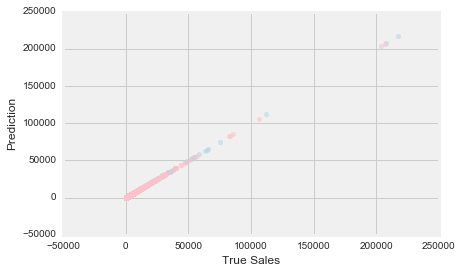

Number of features:  8
['bottle_profit' 'bottle_volume_ml' 'bottles_sold' 'profit' 'profit_margin'
 'state_bottle_cost' 'state_bottle_retail' 'volume_sold_liters']

coefficient: [ -1.67004176e+01   2.54750250e-03   1.35711401e-01   3.04001052e+00
  -3.28919825e+00   1.33261257e+01  -3.37429190e+00  -3.80289672e-01]
intercept: -6.50900254048
Linear Model:  0.999984766017 0.999993646258

Lasso Model:  0.9999725983 0.999986995276 (alpha is  0.01 )
Lasso Model:  0.999972327856 0.999986726974 (alpha is  1 )
Lasso Model:  0.999974495042 0.999988662093 (alpha is  100 )

Ridge Model:  0.999984766017 0.999993646261 (alpha is  0.01 )
Ridge Model:  0.999984766012 0.999993646548 (alpha is  1 )
Ridge Model:  0.999984726191 0.999993656371 (alpha is  100 )


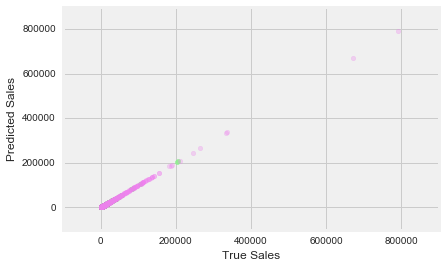

In [35]:
# select columns not to include as a feature and call function
exclude = ['sales']
Q1_2016_to_Q1_2015(exclude)
Q1_2015_to_Q234_2015(exclude)

Number of features:  5
['bottle_volume_ml' 'bottles_sold' 'state_bottle_cost'
 'state_bottle_retail' 'volume_sold_liters']

coefficient: [ -0.1010839    2.60606577 -87.18735767  63.97731693  12.43858382]
intercept: -93.6223794296
Linear Model:  0.989226900044 0.98544682457

Lasso Model:  0.989223821039 0.985426123992 (alpha is  0.01 )
Lasso Model:  0.989223821208 0.985426114271 (alpha is  1 )
Lasso Model:  0.989223821917 0.985425066689 (alpha is  100 )

Ridge Model:  0.989226900044 0.985446827334 (alpha is  0.01 )
Ridge Model:  0.98922689848 0.985447077929 (alpha is  1 )
Ridge Model:  0.989225532012 0.985440299176 (alpha is  100 )


/Users/Lydia/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


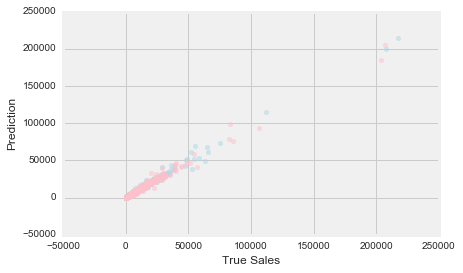

Number of features:  5
['bottle_volume_ml' 'bottles_sold' 'state_bottle_cost'
 'state_bottle_retail' 'volume_sold_liters']

coefficient: [ -1.04009592e-01   4.64039318e+00   1.87727322e+02  -1.18952048e+02
   1.06411595e+01]
intercept: -169.152396341
Linear Model:  0.98651847636 0.991591870206

Lasso Model:  0.986471476384 0.991549509844 (alpha is  0.01 )
Lasso Model:  0.986471473886 0.991549508902 (alpha is  1 )
Lasso Model:  0.986471398527 0.991548214462 (alpha is  100 )

Ridge Model:  0.98651847636 0.991591868748 (alpha is  0.01 )
Ridge Model:  0.986518474683 0.991591724662 (alpha is  1 )
Ridge Model:  0.986511672084 0.991580022062 (alpha is  100 )


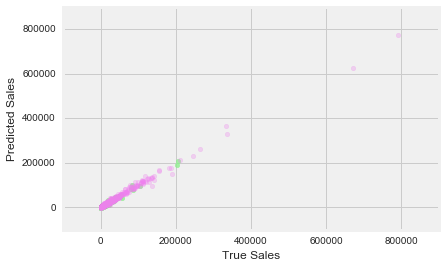

In [36]:
## exclude all the profit related features
exclude = exclude + ['bottle_profit','profit','profit_margin']
Q1_2016_to_Q1_2015(exclude)
Q1_2015_to_Q234_2015(exclude)

Number of features:  3
['state_bottle_cost' 'state_bottle_retail' 'volume_sold_liters']

coefficient: [ 1797.98810566 -1197.7894656     14.90820053]
intercept: -361.203764553
Linear Model:  0.982123085648 0.967164769403

Lasso Model:  0.980804696473 0.973169079827 (alpha is  0.01 )
Lasso Model:  0.98080468946 0.973169058621 (alpha is  1 )
Lasso Model:  0.980804270255 0.973167616007 (alpha is  100 )

Ridge Model:  0.982123085594 0.967168493154 (alpha is  0.01 )
Ridge Model:  0.982122568678 0.967525017487 (alpha is  1 )
Ridge Model:  0.981532901158 0.973935233436 (alpha is  100 )


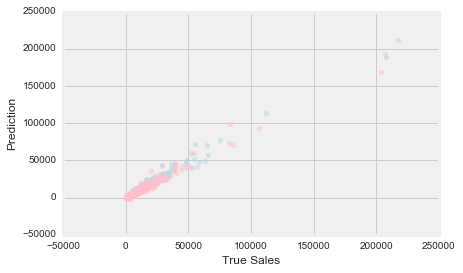

Number of features:  3
['state_bottle_cost' 'state_bottle_retail' 'volume_sold_liters']

coefficient: [ 1279.02065449  -851.22015247    15.10337233]
intercept: -499.63585508
Linear Model:  0.976697715183 0.984977585909

Lasso Model:  0.973643044179 0.98254670536 (alpha is  0.01 )
Lasso Model:  0.973643020102 0.982546681052 (alpha is  1 )
Lasso Model:  0.973640610889 0.982544248983 (alpha is  100 )

Ridge Model:  0.976697715176 0.984977526056 (alpha is  0.01 )
Ridge Model:  0.976697651655 0.98497160462 (alpha is  1 )
Ridge Model:  0.976395970716 0.984455810482 (alpha is  100 )


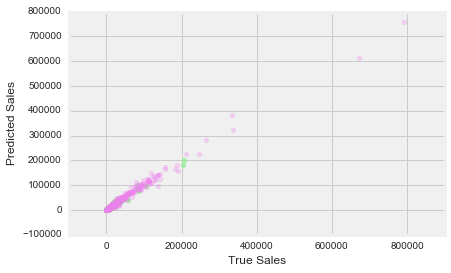

In [37]:
# exclude ones with low coef
exclude = exclude + ['bottle_volume_ml','bottles_sold']
# exclude = exclude + ['state_bottle_retail','state_bottle_cost']
Q1_2016_to_Q1_2015(exclude)
Q1_2015_to_Q234_2015(exclude)

Number of features:  2
['bottle_volume_ml' 'state_bottle_cost']

coefficient: [ -0.13392758  26.56502632]
intercept: -533.964270197
Linear Model:  0.601926183967 0.617348832442

Lasso Model:  0.601926183967 0.617348831671 (alpha is  0.01 )
Lasso Model:  0.601926183966 0.617348755355 (alpha is  1 )
Lasso Model:  0.601926177419 0.617341117528 (alpha is  100 )

Ridge Model:  0.601926183967 0.617348832426 (alpha is  0.01 )
Ridge Model:  0.601926183967 0.61734883086 (alpha is  1 )
Ridge Model:  0.601926183964 0.617348674241 (alpha is  100 )


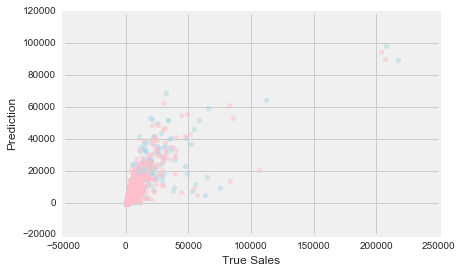

Number of features:  2
['bottle_volume_ml' 'state_bottle_cost']

coefficient: [ -0.19437164  32.04868789]
intercept: -231.102588894
Linear Model:  0.620138289151 0.604331975266

Lasso Model:  0.620138289151 0.60433197515 (alpha is  0.01 )
Lasso Model:  0.62013828915 0.604331963676 (alpha is  1 )
Lasso Model:  0.620138282084 0.604330810896 (alpha is  100 )

Ridge Model:  0.620138289151 0.604331975263 (alpha is  0.01 )
Ridge Model:  0.620138289151 0.604331974972 (alpha is  1 )
Ridge Model:  0.620138289147 0.604331945825 (alpha is  100 )


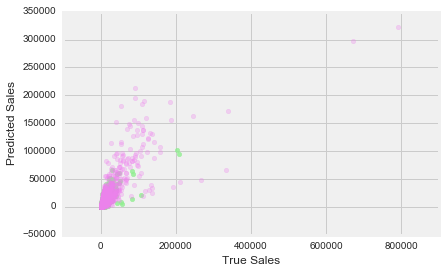

In [38]:
exclude = ['sales','bottle_profit','profit','profit_margin','state_bottle_retail','volume_sold_liters','bottles_sold']
Q1_2016_to_Q1_2015(exclude)
Q1_2015_to_Q234_2015(exclude)

Number of features:  1
['bottle_volume_ml']

coefficient: [ 0.17203537]
intercept: -1472.54768432
Linear Model:  0.543017620406 0.53689856869

Lasso Model:  0.543017620406 0.53689856869 (alpha is  0.01 )
Lasso Model:  0.543017620406 0.536898568682 (alpha is  1 )
Lasso Model:  0.543017620406 0.536898567906 (alpha is  100 )

Ridge Model:  0.543017620406 0.53689856869 (alpha is  0.01 )
Ridge Model:  0.543017620406 0.53689856869 (alpha is  1 )
Ridge Model:  0.543017620406 0.53689856869 (alpha is  100 )


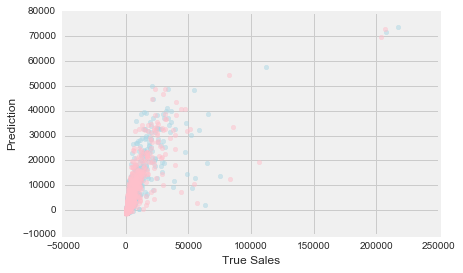

Number of features:  1
['bottle_volume_ml']

coefficient: [ 0.17258912]
intercept: -1422.74622987
Linear Model:  0.536940750747 0.536003917627

Lasso Model:  0.536940750747 0.536003917627 (alpha is  0.01 )
Lasso Model:  0.536940750747 0.536003917566 (alpha is  1 )
Lasso Model:  0.536940750747 0.536003911491 (alpha is  100 )

Ridge Model:  0.536940750747 0.536003917627 (alpha is  0.01 )
Ridge Model:  0.536940750747 0.536003917627 (alpha is  1 )
Ridge Model:  0.536940750747 0.536003917627 (alpha is  100 )


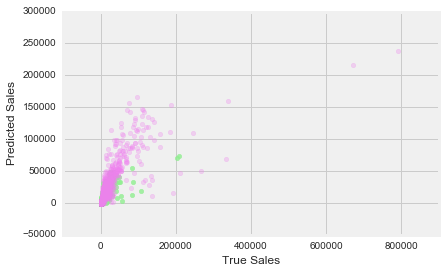

In [39]:
# try the worse coef -> just to see how it react 
exclude = ['sales','bottle_profit','profit','profit_margin','state_bottle_retail','state_bottle_cost','volume_sold_liters','bottles_sold']
Q1_2016_to_Q1_2015(exclude)
Q1_2015_to_Q234_2015(exclude)

## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

In [40]:
# final model 
x_train = df2016s[['state_bottle_cost', 'state_bottle_retail', 'volume_sold_liters']]
y_train = df2016s['sales']
# set 2015's 1st quarter as the testing set to see how well the model performs
x_test = df2015q1_s[['state_bottle_cost', 'state_bottle_retail', 'volume_sold_liters']]
y_test = df2015q1_s['sales']

# create ridge model
ridge = linear_model.Ridge(alpha= 0.1)
ridge_model = ridge.fit(x_train, y_train)
r2_r_train = r2_score(y_train, ridge_model.predict(x_train))
r2_r_test = r2_score(y_test, ridge_model.predict(x_test))
print "coefficient:", ridge.coef_
print "intercept:", ridge.intercept_
print "Ridge Model: ", r2_r_train, r2_r_test

# cross validation 
rcv = linear_model.RidgeCV(alphas=
                           (.0001, .001, .01, .1, .5, 1, 5, 10),
                           store_cv_values=True)
rcv_model = rcv.fit(x_train, y_train)
rcv_r2 =  r2_score(y_test, rcv_model.predict(x_test))
print rcv_r2
print rcv_model.alpha_


coefficient: [ 1794.36491435 -1195.37495606    14.90810478]
intercept: -361.38532673
Ridge Model:  0.982123080289 0.96720189361
0.967524872682
1.0


In [41]:
# improve alpha and predict sales 
x_train1 = df2016[['state_bottle_cost', 'state_bottle_retail', 'volume_sold_liters']]
y_train1 = df2016['sales']

ridge = linear_model.Ridge(alpha= 1)
ridge_model2 = ridge.fit(x_train1, y_train1)
x_pred = df2015[['state_bottle_cost', 'state_bottle_retail', 'volume_sold_liters']]
y_pred = ridge_model2.predict(x_pred)
df2015['prediction'] = y_pred

ndf1 = df2015[['state_bottle_cost', 'state_bottle_retail', 'volume_sold_liters','sales','prediction','date','quarter']]

ndf1['date1'] = pd.DatetimeIndex(ndf1['date']).map(lambda t: t.replace(year=2016))
ndf1= ndf1.ix[(ndf1['quarter']==2)|(ndf1['quarter']==3)|(ndf1['quarter']==4)]


/Users/Lydia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Lydia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

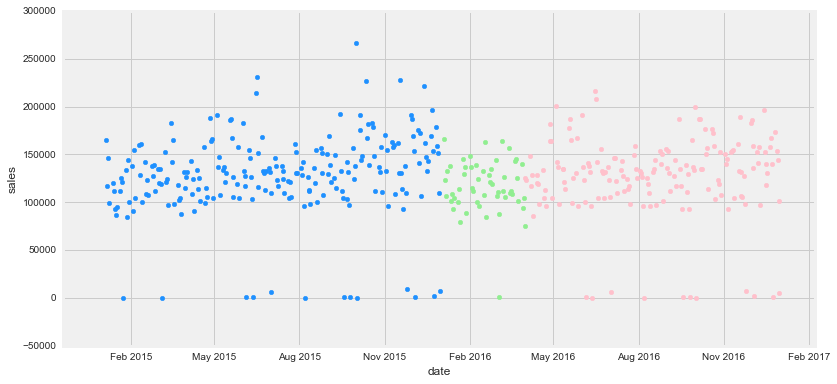

In [57]:
# plot current sales data and predicted sales data

df2015_date = pd.pivot_table(df2015, index=['date'], aggfunc = sum).reset_index()
df2016q1_date = pd.pivot_table(df2016, index=['date'], aggfunc = sum).reset_index()
df2016_date = pd.pivot_table(ndf1, index=['date1'], aggfunc = sum).reset_index()

plt.figure(figsize=(12,6))
plt.scatter(pd.DatetimeIndex(df2015_date['date']).to_pydatetime(), df2015_date.sales, color = 'dodgerblue')
plt.scatter(pd.DatetimeIndex(df2016q1_date['date']).to_pydatetime(), df2016q1_date.sales, color = 'lightgreen')
plt.scatter(pd.DatetimeIndex(df2016_date['date1']).to_pydatetime(), df2016_date.prediction, color = 'pink')
plt.xlabel('date')
plt.ylabel('sales')
plt.show()

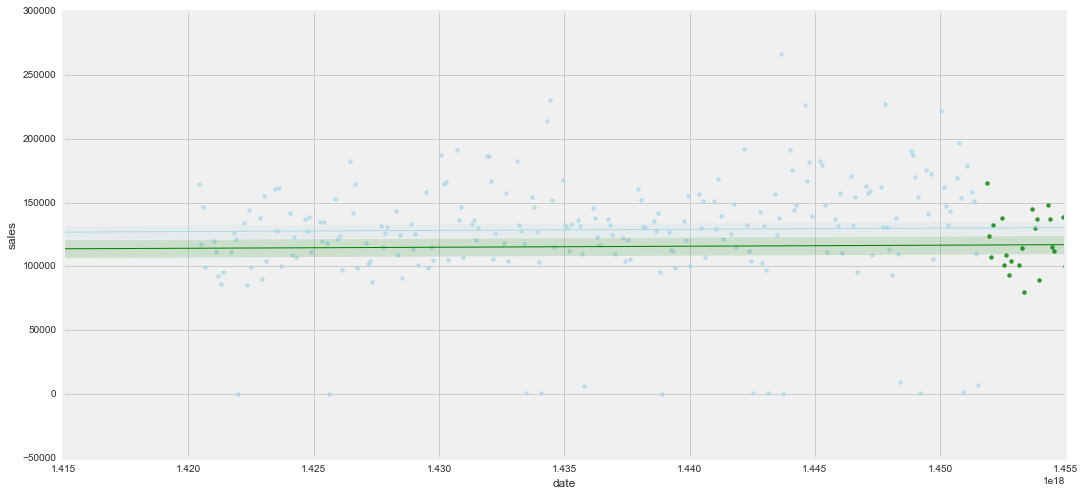

In [62]:
# Another way of plotting it 
date_t2015 = df2015_date['date'].astype(int)
date_t2016q1 = df2016q1_date['date'].astype(int)

fig, ax = plt.subplots(figsize=(16,8))
sns.regplot(date_t2015, df2015_date.sales, color='lightblue',line_kws={"linewidth": 1}, ax=ax)
sns.regplot(date_t2016q1, df2016q1_date.sales, color='green',line_kws={"linewidth": 1}, ax=ax)
sns.despine(ax=ax2, left=True, right=False)
sns.plt.show()


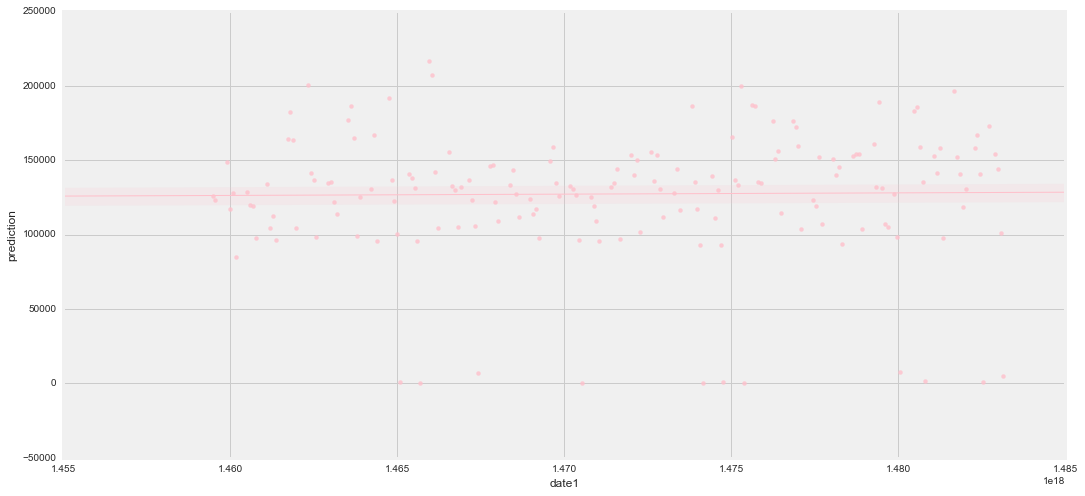

In [64]:
fig, ax = plt.subplots(figsize=(16,8))
date_t2016 = df2016_date['date1'].astype(int)
sns.regplot(date_t2016, df2016_date.prediction, color='pink',line_kws={"linewidth": 1},ax=ax)

In [81]:
# calculate if there is an increase in growth. 
print "Precentage increased: " + str(((df2016q1_date.sales.sum() + df2016_date.sales.sum())/df2015_date.sales.sum()))

Precentage increased: 1.00230561931


## Conclusion 
Other than the fact that we will be expecting a pike in the summer and at the end of the year during holiday seasons, there is no significant growth in liquor sales compared to last year (2015).